#### IMPORTING THE NECESSARY LIBRARIES

In [80]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
## warning
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.io as pio


#### LOADING THE DATA

In [81]:
## load my dataset
df = pd.read_csv('country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### UNDERSTANDING & CLEANING THE DATA

In [82]:
# shape of dataset
df.shape

(167, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [84]:
df.duplicated().sum()

0

In [85]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [86]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### PREPROCESSING & EDA

In [87]:
# correlation matrix
corr_mat = df.corr(numeric_only=True)
corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

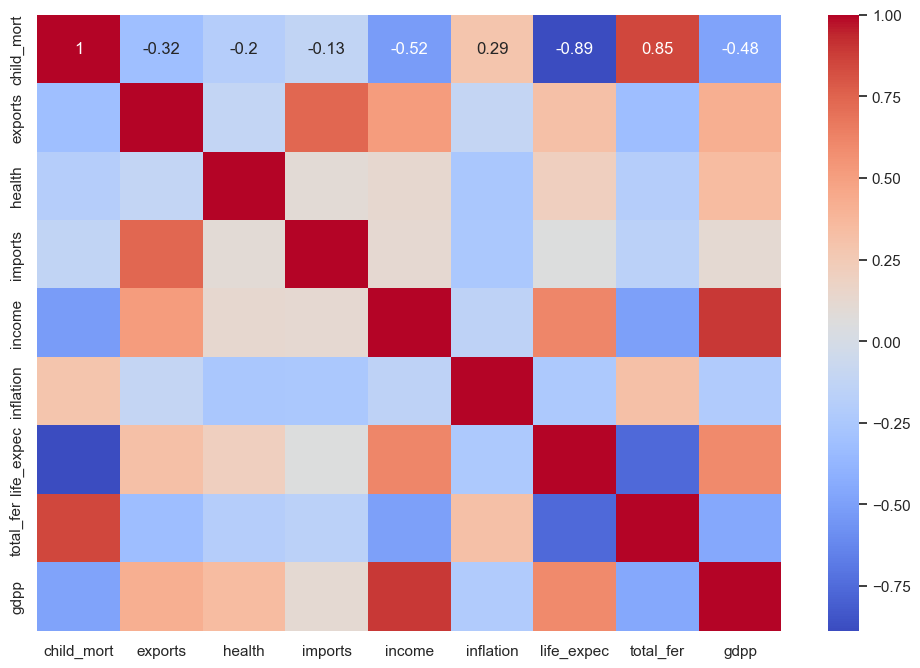

In [88]:
## plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

From above we can conclude that:

1. gdpp, income, imports, exports and total_fert are highly positive correlated
2. whereas life_expec and child_mort are highly negative correlated

In [89]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [90]:
# Numerical Features
num_df = df.iloc[:,1:]

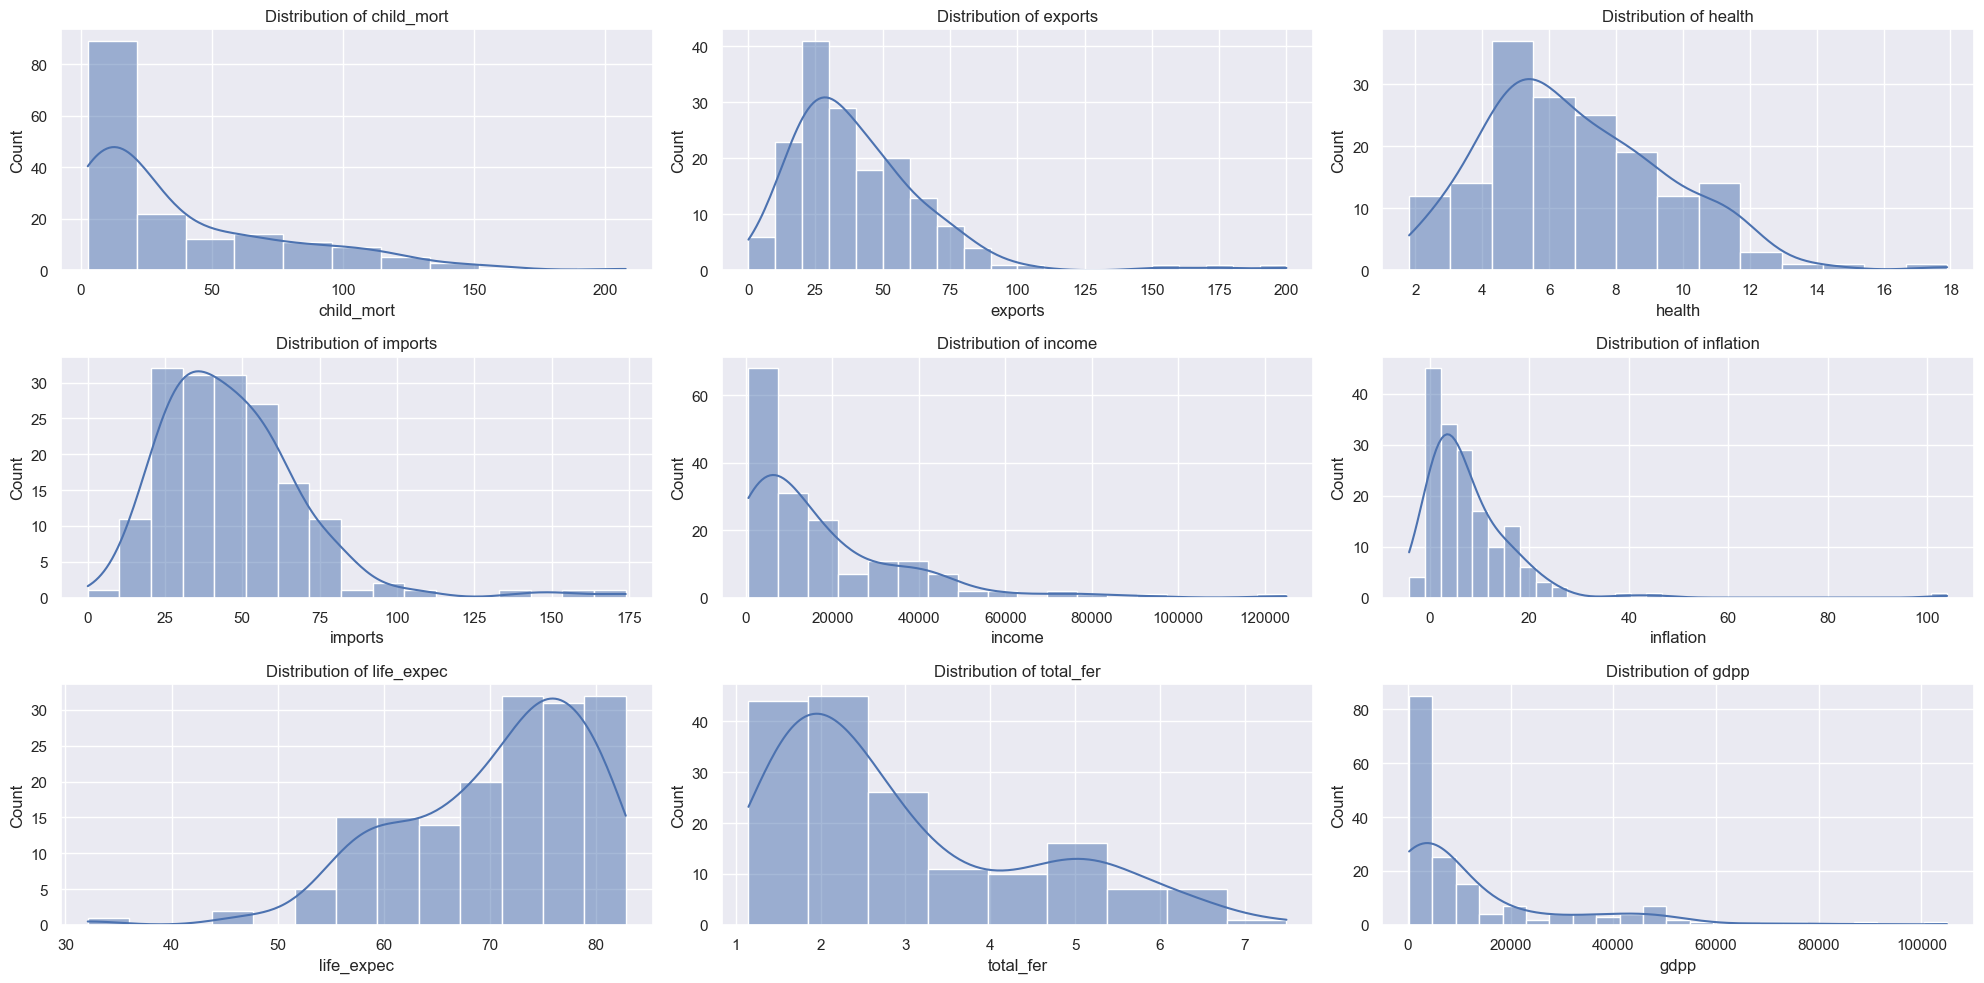

In [91]:
# Histplot of Numerical Features
plt.figure(figsize=(20, 10))
for e, i in enumerate(num_df.columns):
    plt.subplot(3, 3, e+1)
    sns.histplot(df[i], kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()

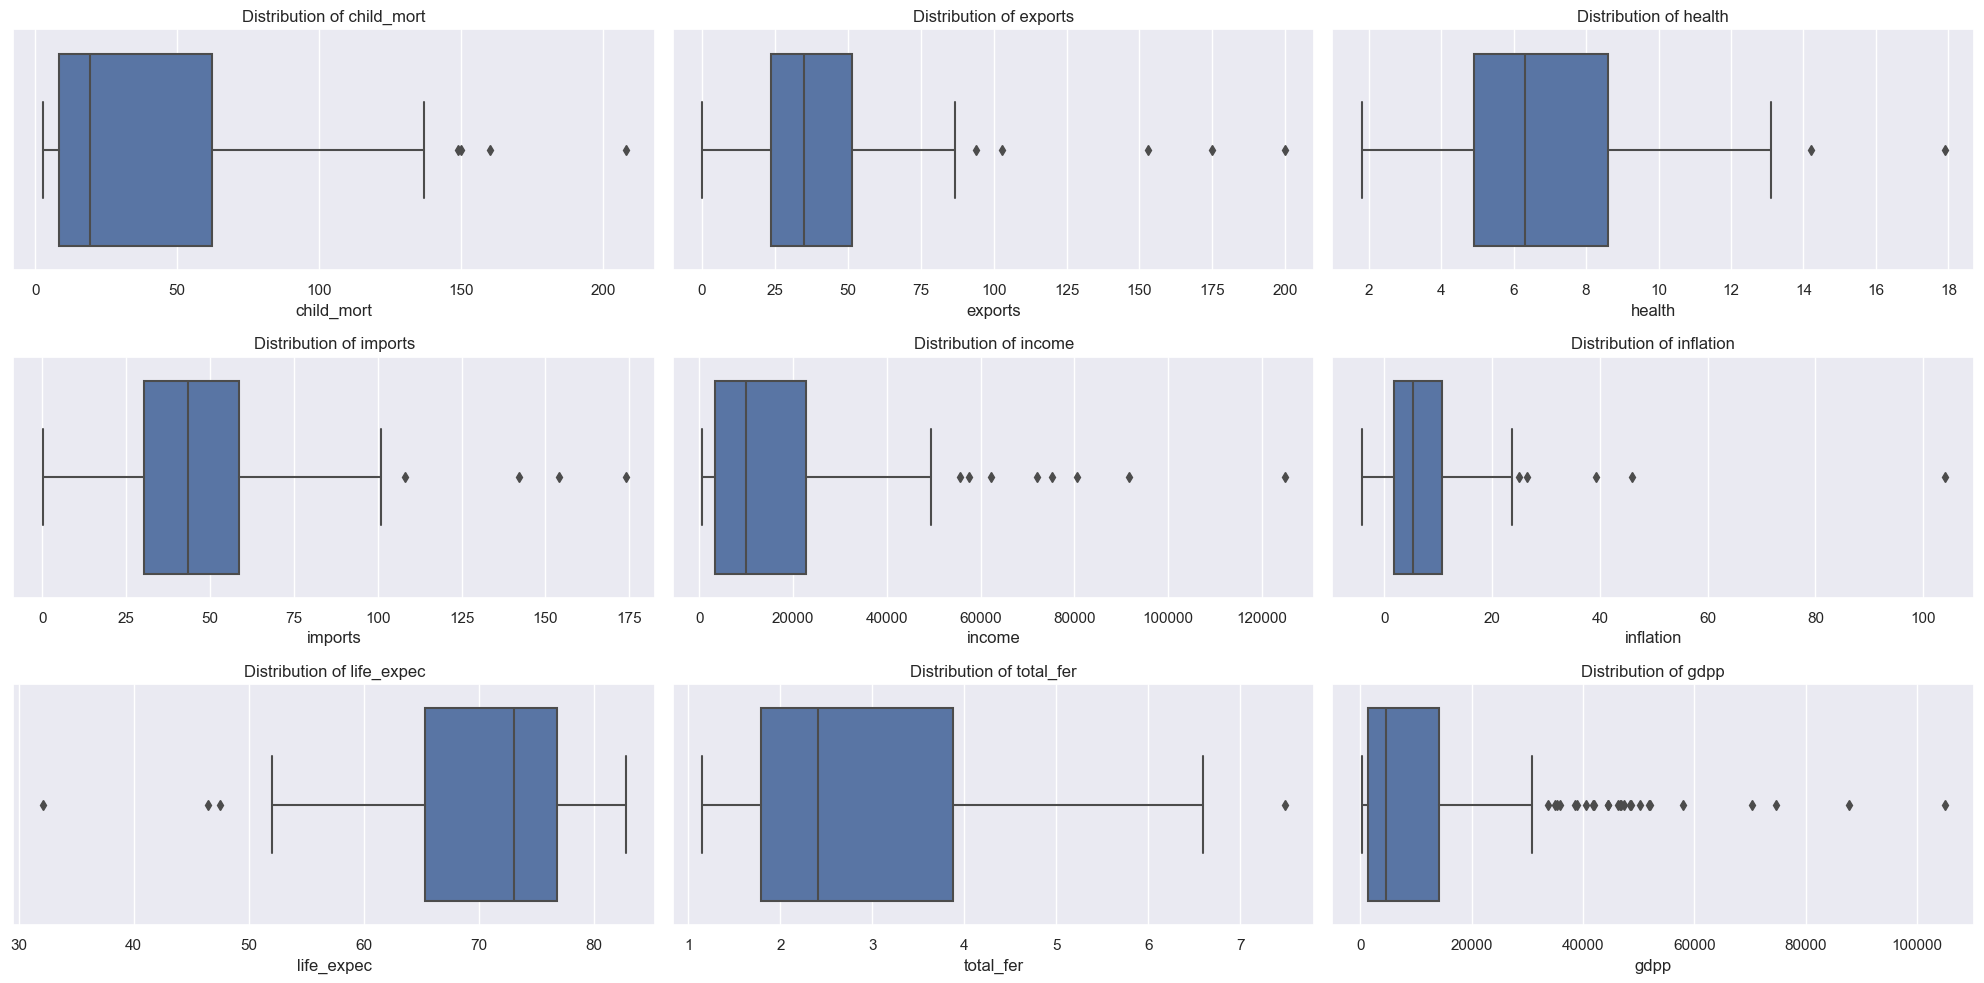

In [92]:
# Boxplot of Numerical Features
plt.figure(figsize=(20, 10))
for e, i in enumerate(num_df.columns):
    plt.subplot(3, 3, e+1)
    sns.boxplot(x=df[i])
    plt.title('Distribution of ' + i)
    plt.tight_layout()

From above box-plots we can see that there are so many outliers in our dataset. 
But we are not going to do it as our dataset is very small (167 rows only).

In [93]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

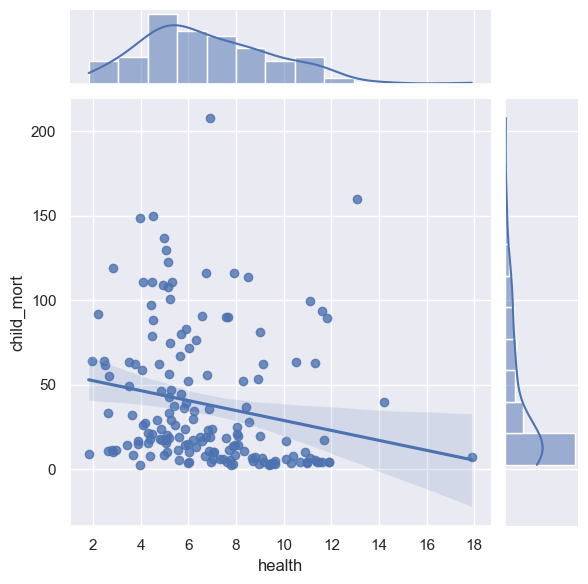

In [94]:
sns.jointplot(x='health', y='child_mort', data=df, kind='reg')

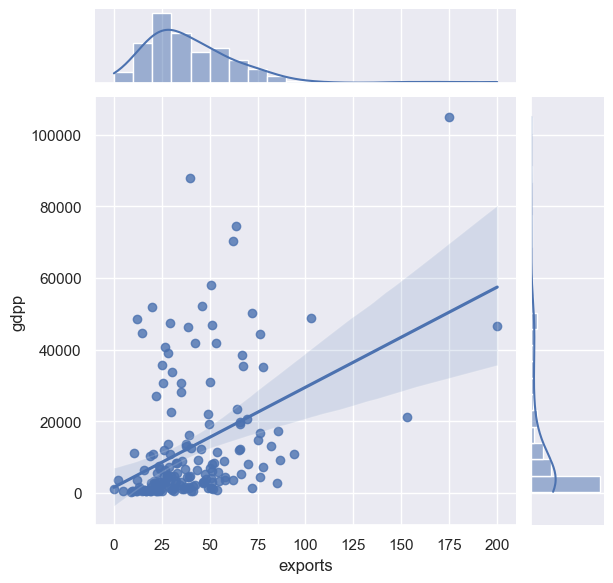

In [95]:
sns.jointplot(x='exports', y='gdpp', data=df, kind='reg')

#### MODEL BUILDING, TRAINING & VALIDATING

## 1. K-Means Clustring

Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [96]:
#scaling data
scaling = StandardScaler()
scaled = scaling.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled,columns=num_df.columns)

# print scaled dataframe
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


To decide how many number of clusters consider we are going to use a most popular elbow method

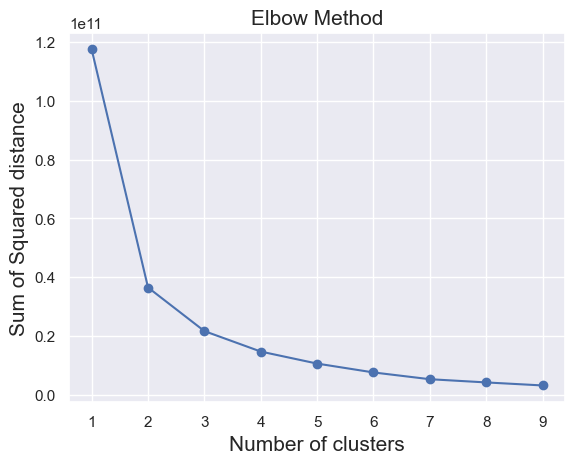

In [97]:
# plot elbow curve
elb = []
krange = range(1,10)
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(num_df)
    elb.append(km.inertia_)

plt.plot(krange, elb, marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

we can see the elbow bend is at 3 so we choose 3 as the number of clusters

In [98]:
## clusters
km = KMeans(n_clusters=3)
y_kmeans = km.fit_predict(scaled_df)
y_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [99]:
#count number of records in every cluster
pd.Series(y_kmeans).value_counts()

1    84
0    47
2    36
Name: count, dtype: int64

In [100]:
cluster_df = pd.DataFrame(df)
cluster_df['km_cluster'] = y_kmeans
cluster_df[['country','km_cluster']]

,country,km_cluster
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Angola,0
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,1
165,Yemen,0


#### EVALUATION, TUNING & CONCLUSION

In [101]:
## centroid
km.cluster_centers_

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536]])

In [102]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  831.4244352086873


#### Visualization of clusters

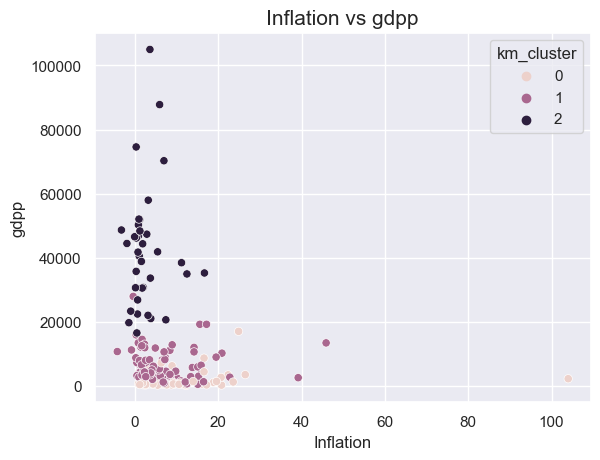

In [103]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(x=cluster_df['inflation'],y=cluster_df['gdpp'],hue='km_cluster',data=cluster_df) 
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

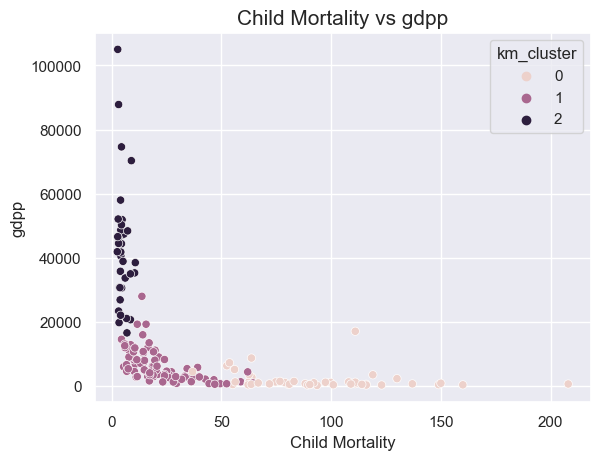

In [104]:
#visulization of clusters child mortality vs gdpp

sns.scatterplot(x=cluster_df['child_mort'],y=cluster_df['gdpp'],hue='km_cluster',data=cluster_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that:
1. Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
2. Country having low child-mortality, high gdpp and high infaltion is the developed country

So here we conclude that
0 = developed country (Developed)
1 = developing country (Developing)
2 = under-developing country (Under-developed)

In [105]:
developed_km = cluster_df[cluster_df['km_cluster']==1]['country']
developing_km = cluster_df[cluster_df['km_cluster']==2]['country']
under_developing_km = cluster_df[cluster_df['km_cluster']==0]['country']

In [106]:
print("K-Means Clustring -->")
print("Number of developed countries",len(developed_km))
print("Number of developing countries",len(developing_km))
print("Number of under-developing countries",len(under_developing_km))

K-Means Clustring -->
Number of developed countries 84
Number of developing countries 36
Number of under-developing countries 47





## 2. Hierarchical Clustring

In [107]:
# Normalise
norm_df = normalize(num_df)
norm_df = pd.DataFrame(norm_df, columns=num_df.columns)

norm_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296
5,0.000679,0.000885,0.000379,0.000749,0.875912,0.000979,0.003550,0.000111,0.482454
6,0.002435,0.002798,0.000592,0.006093,0.901246,0.001045,0.009860,0.000227,0.433136
7,0.000072,0.000298,0.000131,0.000315,0.623592,0.000017,0.001235,0.000029,0.781749
8,0.000067,0.000805,0.000173,0.000750,0.677497,0.000014,0.001262,0.000023,0.735523
9,0.002301,0.003188,0.000345,0.001215,0.939365,0.000810,0.004057,0.000113,0.342868


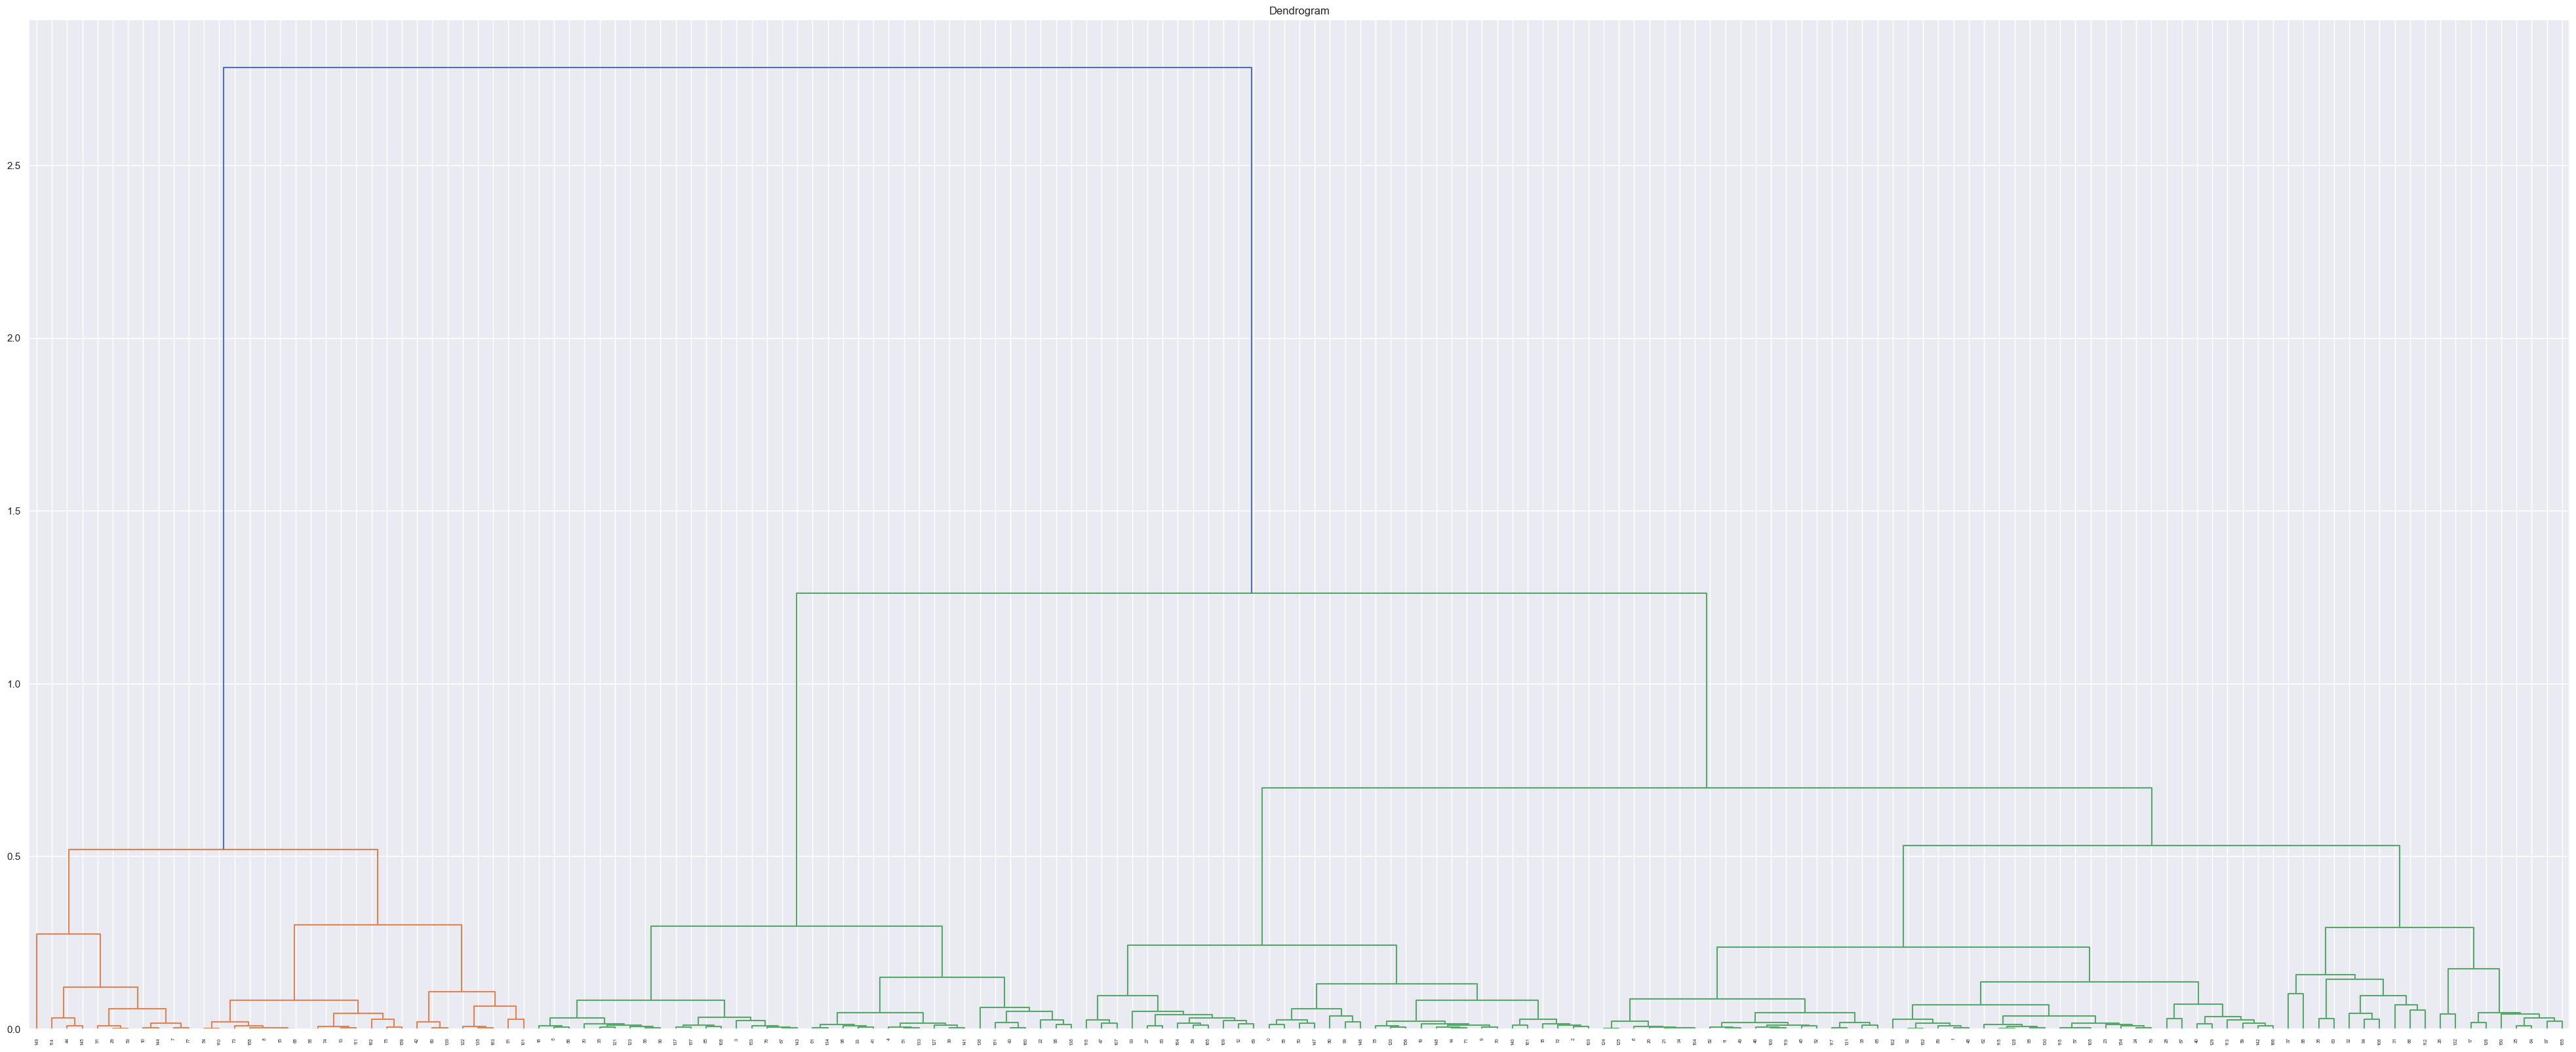

In [108]:
# Dendrograms

plt.figure(figsize=(50, 20))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(norm_df, method='ward'))

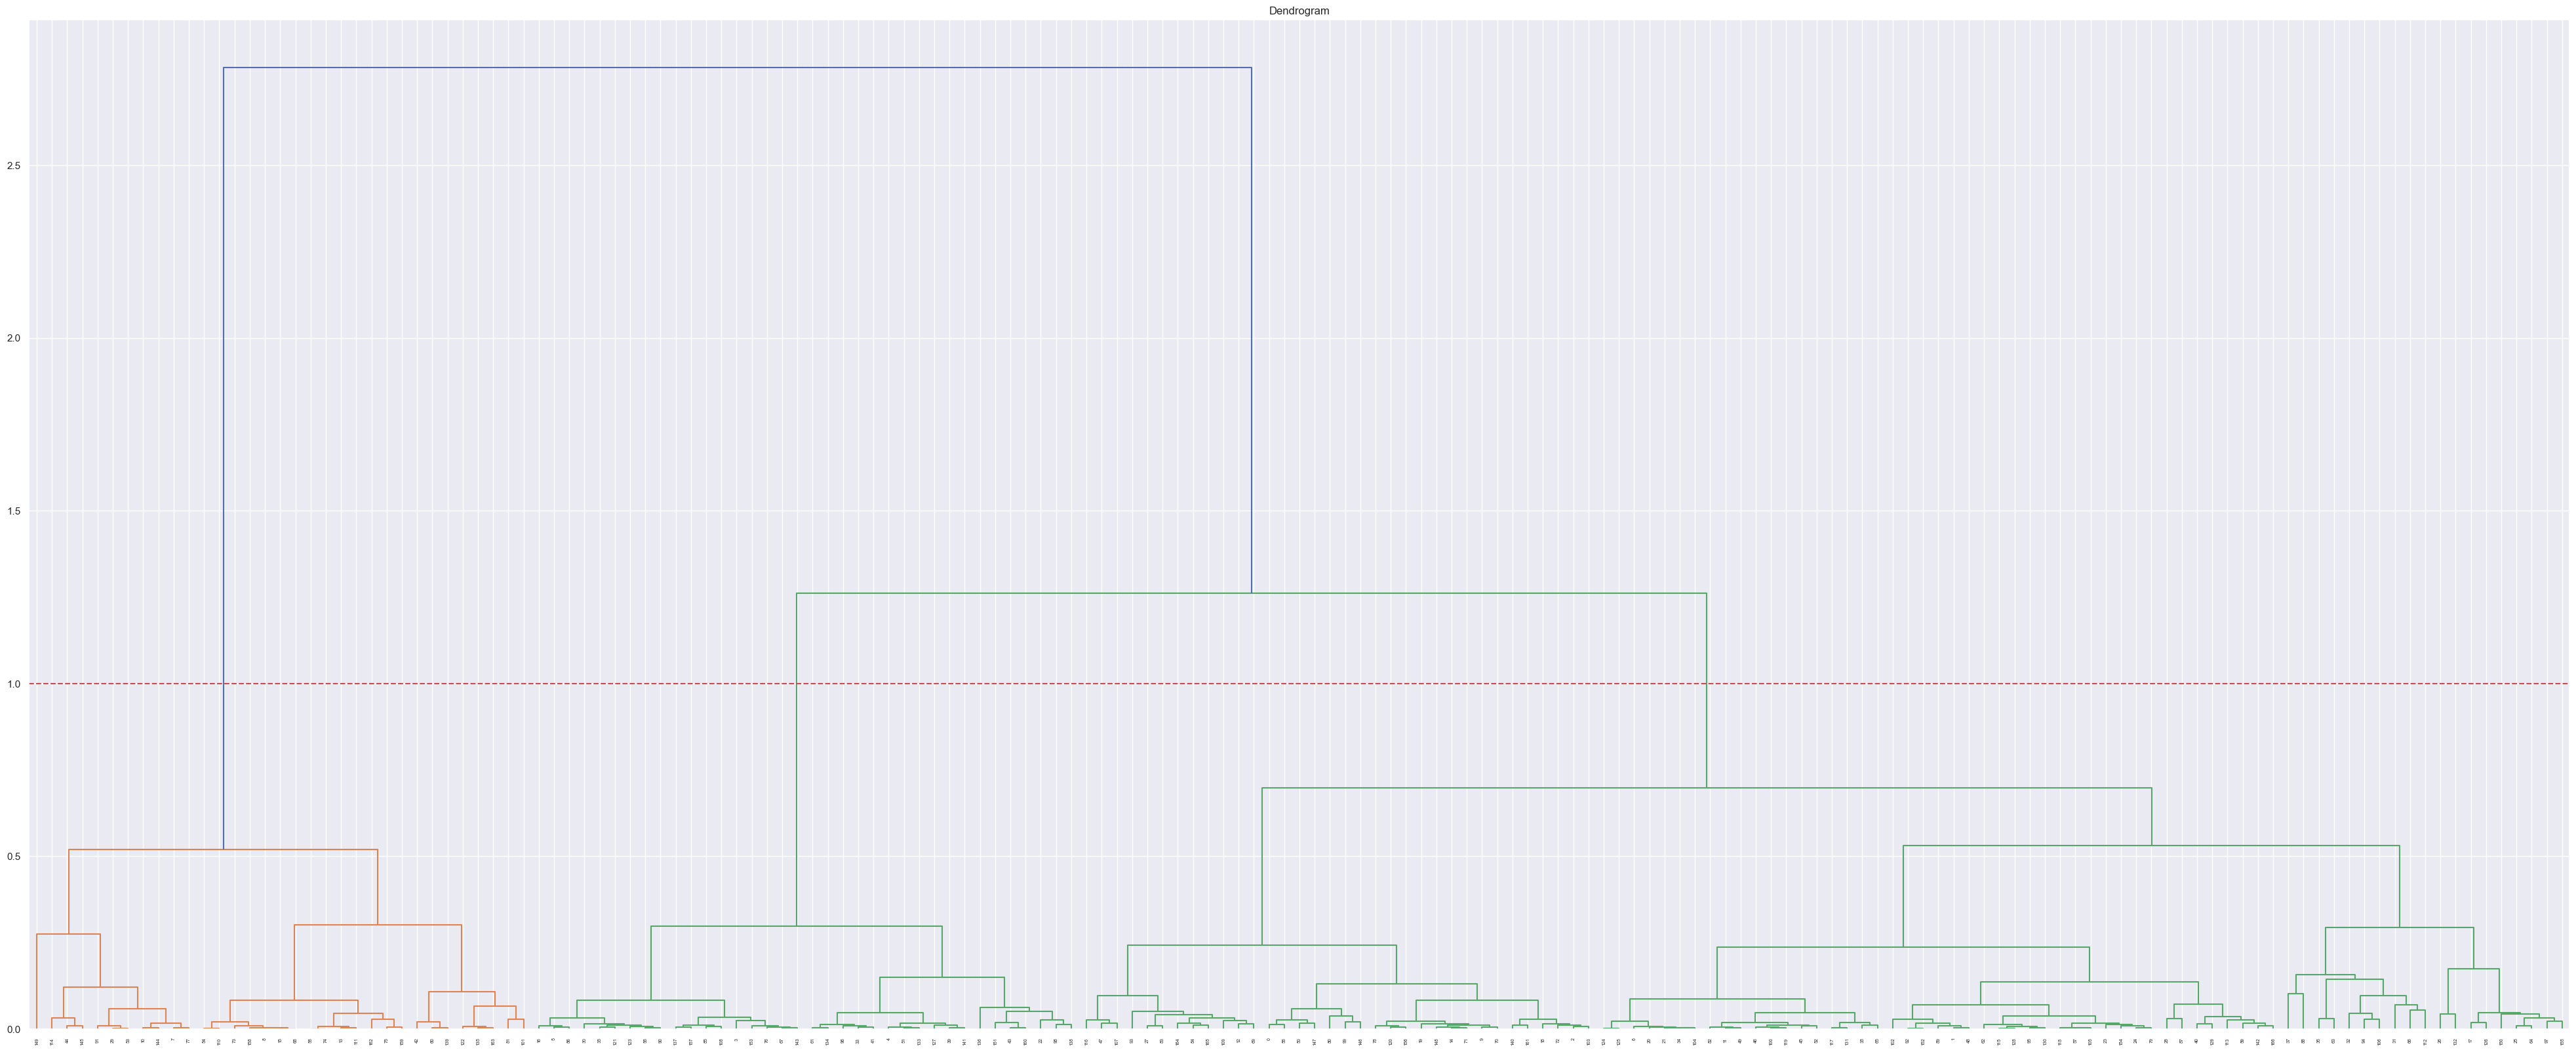

In [109]:
plt.figure(figsize=(50, 20))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(norm_df, method='ward'))
plt.axhline(y=1.0, color='r', linestyle='--')

In [110]:
# Clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = cluster.fit_predict(norm_df)
y_hc

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0])

In [111]:
#count number of records in every cluster
pd.Series(y_hc).value_counts()

0    98
2    36
1    33
Name: count, dtype: int64

In [112]:
cluster_df['h_cluster'] = y_hc
cluster_df[['country', 'h_cluster']]

,country,h_cluster
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,2
4,Antigua and Barbuda,2
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,0
165,Yemen,0


#### Visualization of clusters

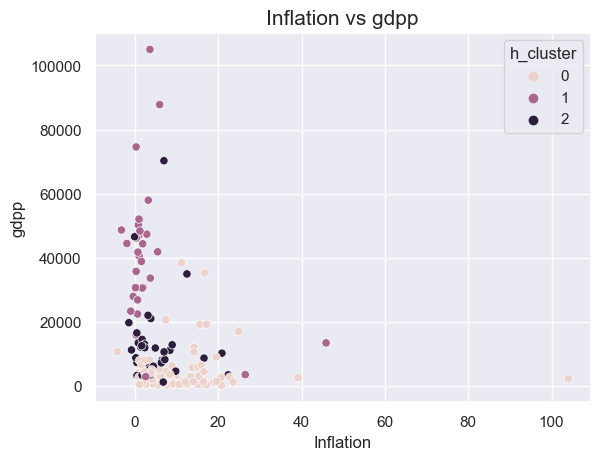

In [113]:
#visulization of clusters inflation vs gdpp

sns.scatterplot(x=cluster_df['inflation'],y=cluster_df['gdpp'],hue='h_cluster',data=cluster_df) 
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

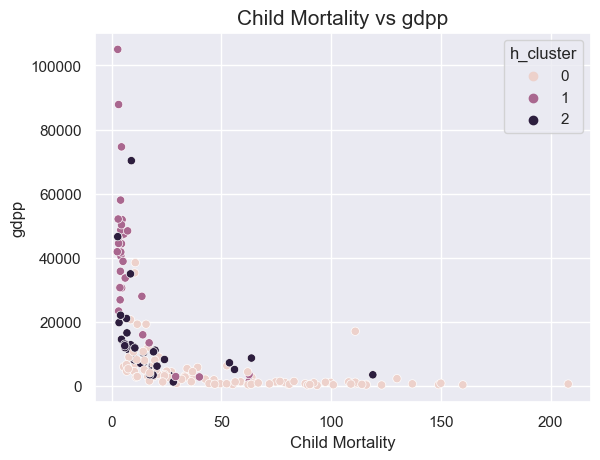

In [114]:
#visulization of clusters child mortality vs gdpp

sns.scatterplot(x=cluster_df['child_mort'],y=cluster_df['gdpp'],hue='h_cluster',data=cluster_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that:
1. Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
2. Country having low child-mortality, high gdpp and high infaltion is the developed country

So here we conclude that
0 = under-developing country
1 = developed country
2 = developing country

In [115]:
developed_h = cluster_df[cluster_df['h_cluster']==1]['country']
developing_h = cluster_df[cluster_df['h_cluster']==2]['country']
under_developing_h = cluster_df[cluster_df['h_cluster']==0]['country']

In [116]:
print("Hierarchical Clustring -->")
print("Number of developed countries:",len(developed_h))
print("Number of developing countries:",len(developing_h))
print("Number of under-developing countries:",len(under_developing_h))

Hierarchical Clustring -->
Number of developed countries: 33
Number of developing countries: 36
Number of under-developing countries: 98


In [117]:
cluster_df['cluster_km'] = cluster_df['km_cluster']
cluster_df['cluster_h'] = cluster_df['h_cluster']
cluster_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster,h_cluster,cluster_km,cluster_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1,1,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0,0,0


0 = developed country (Developed)
1 = developing country (Developing)
2 = under-developing country (Under-developed)

In [118]:
cluster_df.loc[cluster_df['km_cluster'] == 0, 'km_cluster'] = 'Developed'
cluster_df.loc[cluster_df['km_cluster'] == 2, 'km_cluster'] = 'Under-developing'
cluster_df.loc[cluster_df['km_cluster'] == 1, 'km_cluster'] = 'Developing'
cluster_df.loc[cluster_df['h_cluster'] == 0, 'h_cluster'] = 'Under-developing'
cluster_df.loc[cluster_df['h_cluster'] == 1, 'h_cluster'] = 'Developed'
cluster_df.loc[cluster_df['h_cluster'] == 2, 'h_cluster'] = 'Developing'

cluster_df.head(20)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,km_cluster,h_cluster,cluster_km,cluster_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Developed,Under-developing,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing,Under-developing,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing,Under-developing,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Developed,Developing,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developing,Developing,1,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing,Developing,1,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing,Under-developing,1,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Under-developing,Developed,2,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Under-developing,Developed,2,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing,Under-developing,1,0


In [119]:
cluster_df[['country', 'km_cluster', 'h_cluster']].head(25)

,country,km_cluster,h_cluster
0,Afghanistan,Developed,Under-developing
1,Albania,Developing,Under-developing
2,Algeria,Developing,Under-developing
3,Angola,Developed,Developing
4,Antigua and Barbuda,Developing,Developing
5,Argentina,Developing,Developing
6,Armenia,Developing,Under-developing
7,Australia,Under-developing,Developed
8,Austria,Under-developing,Developed
9,Azerbaijan,Developing,Under-developing


In [120]:
# save the clustering file
cluster_df.to_csv('country_clusters.csv',index=False)

# Visualization in World Map

In [121]:
import pycountry

In [122]:
# generate country code  based on country name 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE


In [124]:
# create a column for code 
cluster_df['CODE']=alpha3code(cluster_df.country)
cluster_df.sampl(50)

AttributeError: 'DataFrame' object has no attribute 'sampl'

In [125]:
# Create basic choropleth map
fig = px.choropleth(cluster_df, locations='CODE', color='km_cluster', hover_name='country',
                    projection='equirectangular', title='GDP per Capita by Country')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, '#636efa'], [1.0, '#636efa']],
              'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>km_' ... 'ODE=%{location}<extra></extra>'),
              'hovertext': array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
                                  'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
                                  'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea',
                                  'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
                                  'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
                                  'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
                                  'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
                                  'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
                                  'Yemen', 'Zambia'], dtype=object),
              'locations': array(['AFG', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CAF', 'TCD', 'COM',
                                  'None', 'None', 'None', 'GNQ', 'ERI', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB',
                                  'HTI', 'IRQ', 'KEN', 'KIR', 'None', 'LSO', 'LBR', 'MDG', 'MWI', 'MLI',
                                  'MRT', 'MOZ', 'NAM', 'NER', 'NGA', 'PAK', 'RWA', 'SEN', 'SLE', 'ZAF',
                                  'SDN', 'None', 'TLS', 'TGO', 'UGA', 'YEM', 'ZMB'], dtype=object),
              'name': 'Developed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, '#EF553B'], [1.0, '#EF553B']],
              'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>km_' ... 'ODE=%{location}<extra></extra>'),
              'hovertext': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
                                  'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
                                  'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                                  'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
                                  'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
                                  'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'locations': array(['ALB', 'DZA', 'ATG', 'ARG', 'ARM', 'AZE', 'BHS', 'BGD', 'BRB', 'BLR',
                                  'BLZ', 'BTN', 'None', 'BIH', 'BRA', 'BGR', 'KHM', 'None', 'CHL', 'CHN',
                      

In [126]:
# Create basic choropleth map
fig = px.choropleth(cluster_df, locations='CODE', color='h_cluster', hover_name='country',
                    projection='equirectangular', title='GDP per Capita by Country')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, '#636efa'], [1.0, '#636efa']],
              'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>h_c' ... 'ODE=%{location}<extra></extra>'),
              'hovertext': array(['Afghanistan', 'Albania', 'Algeria', 'Armenia', 'Azerbaijan', 'Bahrain',
                                  'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
                                  'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
                                  'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
                                  'Central African Republic', 'Chad', 'China', 'Comoros',
                                  'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
                                  'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                                  'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia', 'Georgia', 'Ghana',
                                  'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India',
                                  'Indonesia', 'Iran', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
                                  'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Libya',
                                  'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
                                  'Mauritania', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro',
                                  'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Oman',
                                  'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania',
                                  'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
                                  'Sierra Leone', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania',
                                  'Thailand', 'Togo', 'Tunisia', 'Turkmenistan', 'Uganda', 'Ukraine',
                                  'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia'], dtype=object),
              'locations': array(['AFG', 'ALB', 'DZA', 'ARM', 'AZE', 'BHR', 'BGD', 'BLR', 'BEN', 'BTN',
                                  'None', 'BIH', 'BWA', 'None', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAF',
                                  'TCD', 'CHN', 'COM', 'None', 'None', 'None', 'DOM', 'ECU', 'EGY', 'SLV',
                                  'GNQ', 'ERI', 'FJI', 'GMB', 'GEO', 'GHA', 'GTM', 'GIN', 'GNB', 'GUY',
                                  'HTI', 'IND', 'IDN', 'None', 'IRQ', 'JOR', 'KAZ', 'KEN', 'KWT', 'None',
                                  'None', 'LSO', 'LBR', 'LBY', 'None', 'MDG', 'MWI', 'MYS', 'MLI', 'MRT',
                                  'MUS', 'None', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NPL', 'NER', 'NGA',
                                  'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'ROU', 'None', 'RWA', 'SAU',
                                  'SEN', 'SRB', 'SYC', 'SLE', 'LKA', 'SDN', 'TJK', 'None', 'THA', 'TGO',
                                  'TUN', 'TKM', 'UGA', 'UKR', 'UZB', 'None', 'YEM', 'ZMB'], dtype=object),
              'name': 'Under-developing',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, '#EF553B'], [1.0, '#EF553B']],
              'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>h_c' ... 'ODE=%{location}<extra></extra>'),
              'hovertext': array(['Angola', 'Antigua and Barbuda', 'Argentina', 'Belize', 'Brazil',
                                  'Cape Verde', 'Ch

# DEALING WITH OUTLIERS

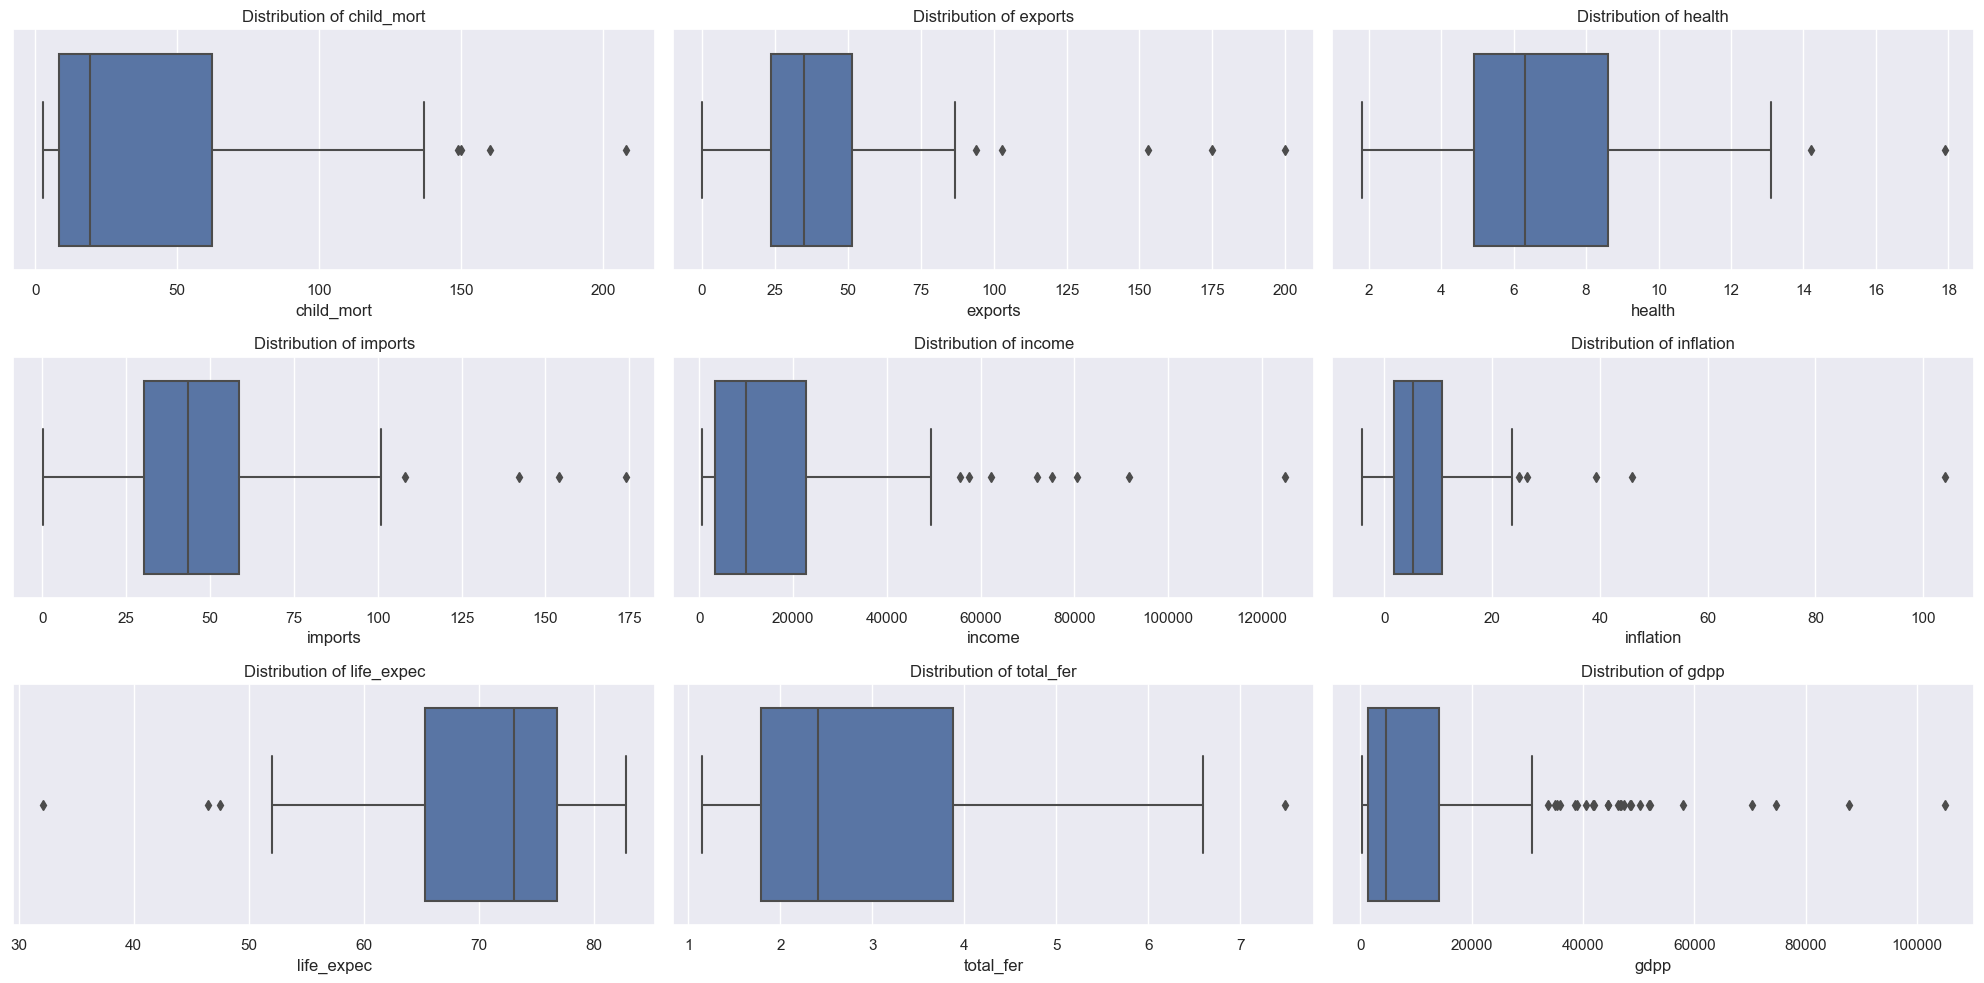

In [127]:
# Boxplot of Numerical Features
num_cap = df.iloc[:,1:]
plt.figure(figsize=(20, 10))
for e, i in enumerate(num_df.columns):
    plt.subplot(3, 3, e+1)
    sns.boxplot(x=df[i])
    plt.title('Distribution of ' + i)
    plt.tight_layout()

In [128]:
cap_df = df.copy()
cap_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [129]:
max_1 = cap_df['child_mort'].quantile(0.95)
max_2 = cap_df['exports'].quantile(0.95)
max_3 = cap_df['health'].quantile(0.95)
max_4 = cap_df['imports'].quantile(0.95)
max_5 = cap_df['income'].quantile(0.95)
max_6 = cap_df['inflation'].quantile(0.95)
max_7 = cap_df['life_expec'].quantile(0.95)
min_7 = cap_df['life_expec'].quantile(0.05)
max_8 = cap_df['total_fer'].quantile(0.95)
max_9 = cap_df['gdpp'].quantile(0.95)

In [130]:
print("Highest allowed (child_mort): ", max_1)
print("Highest allowed (exports): ", max_2)
print("Highest allowed (health): ", max_3)
print("Highest allowed (imports): ", max_4)
print("Highest allowed (income): ", max_5)
print("Highest allowed (inflation): ", max_6)
print("Highest allowed (life_expec): ", max_7)
print("Lowest allowed (life_expec): ", max_7)
print("Highest allowed (total_fer): ", max_8)
print("Highest allowed (gdpp): ", max_9)

Highest allowed (child_mort):  116.0
Highest allowed (exports):  80.56999999999995
Highest allowed (health):  11.569999999999999
Highest allowed (imports):  81.14
Highest allowed (income):  48289.999999999956
Highest allowed (inflation):  20.869999999999997
Highest allowed (life_expec):  81.4
Lowest allowed (life_expec):  81.4
Highest allowed (total_fer):  5.861
Highest allowed (gdpp):  48610.0


In [131]:
cap_df['child_mort'] = np.where(cap_df['child_mort'] > max_1, max_1, cap_df['child_mort'])
cap_df['exports'] = np.where(cap_df['exports'] > max_2, max_2, cap_df['exports'])
cap_df['health'] = np.where(cap_df['health'] > max_3, max_3, cap_df['health'])
cap_df['imports'] = np.where(cap_df['imports'] > max_4, max_4, cap_df['imports'])
cap_df['income'] = np.where(cap_df['income'] > max_5, max_5, cap_df['income'])
cap_df['inflation'] = np.where(cap_df['inflation'] > max_6, max_6, cap_df['inflation'])
cap_df['life_expec'] = np.where(cap_df['life_expec'] > max_7, max_7, cap_df['life_expec'])
cap_df['life_expec'] = np.where(cap_df['life_expec'] < min_7, min_7, cap_df['life_expec'])
cap_df['total_fer'] = np.where(cap_df['total_fer'] > max_8, max_8, cap_df['total_fer'])
cap_df['gdpp'] = np.where(cap_df['gdpp'] > max_9, max_9, cap_df['gdpp'])

In [132]:
max_9

48610.0

In [ ]:
cap_df[cap_df['gdpp'] > max_9]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [133]:
num_cap = cap_df.iloc[:,1:]
num_cap

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.20,5.820,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.30,1.650,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.50,2.890,4460.0
3,116.0,62.3,2.85,42.9,5900.0,20.87,60.10,5.861,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.80,2.130,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.00,3.500,2970.0
163,17.1,28.5,4.91,17.6,16500.0,20.87,75.40,2.470,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.10,1.950,1310.0
165,56.3,30.0,5.18,34.4,4480.0,20.87,67.50,4.670,1310.0


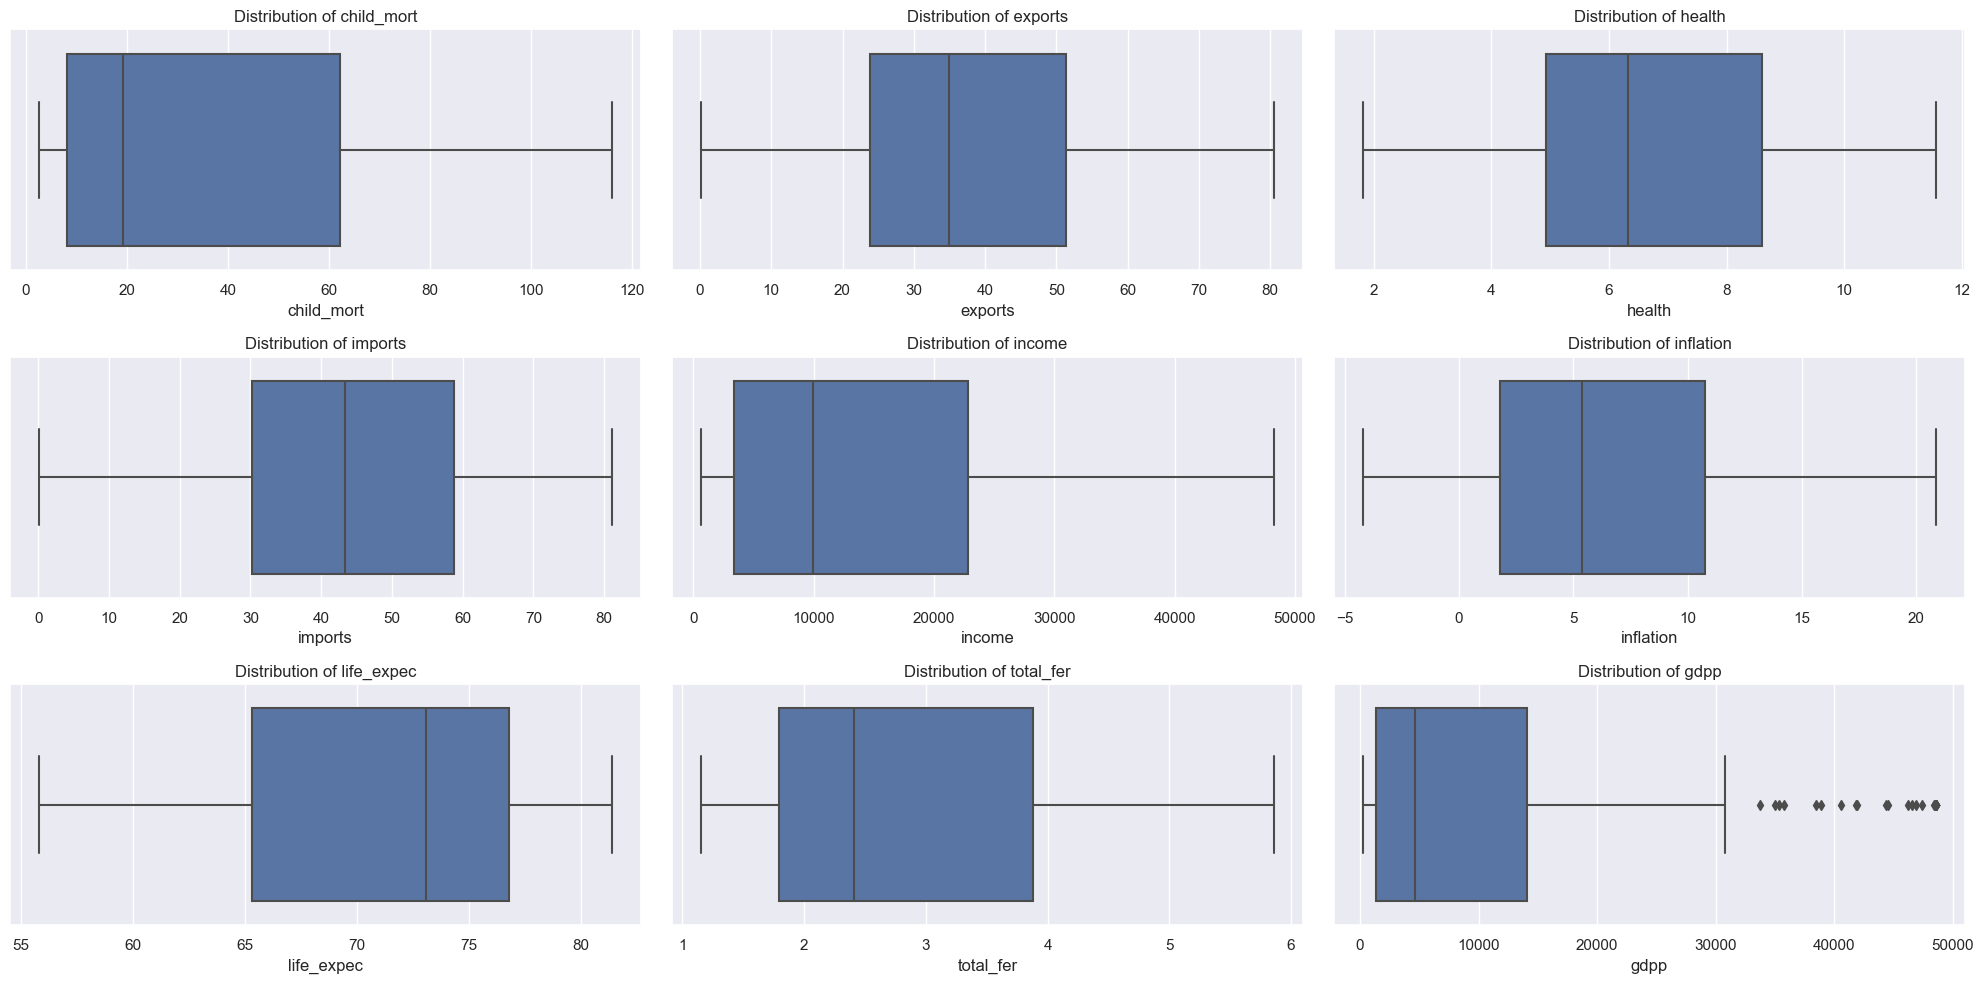

In [134]:
# Boxplot of Numerical Features
plt.figure(figsize=(20, 10))
for e, i in enumerate(num_cap.columns):
    plt.subplot(3, 3, e+1)
    sns.boxplot(x = cap_df[i])
    plt.title('Distribution of ' + i)
    plt.tight_layout()

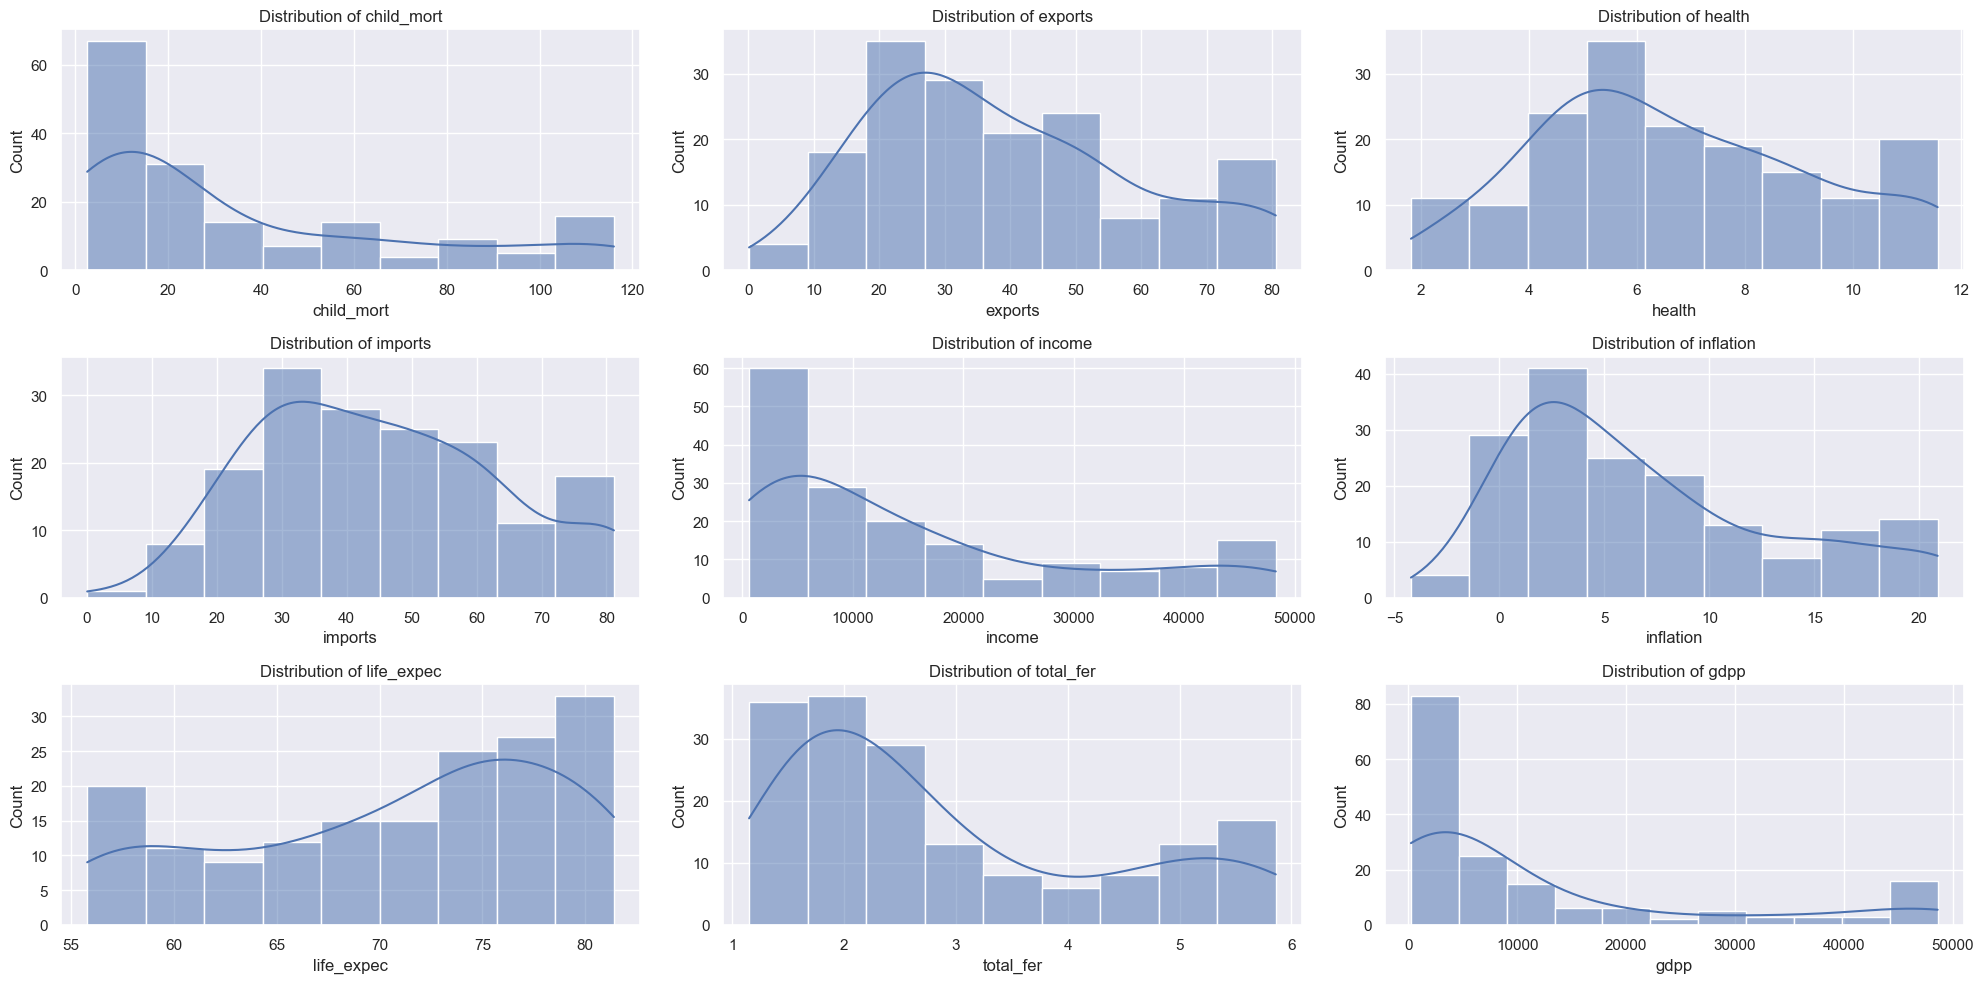

In [135]:
# Histplot of Numerical Features
plt.figure(figsize=(20, 10))
for e, i in enumerate(num_cap.columns):
    plt.subplot(3, 3, e+1)
    sns.histplot(cap_df[i], kde=True)
    plt.title('Distribution of ' + i)
    plt.tight_layout()